## Welcome to this Machine Learning workshop! 

In this workshop you will be guided through a typical Machine Learning workflow.\
There are different steps involved in this process: 
1. Reading the dataset
2. Exploratory Data Analysis (EDA)
3. feature preprocessing
4. model definition and performance evaluation
5. (optionally) model introspection

The data we will work with is acquired from Parkinson's Disease patient that undewent Deep Brain Stimulation surgery. Electrocorticography (ECoG) and Local Field Potentials (LFP) from the Subthalamic Nucleus (STN) were collected.\
The patient was instructed to perform a selfpaced movement task.

The overall context of this analysis is decoding movement for triggering adaptive DBS, as shown in the following Figure:

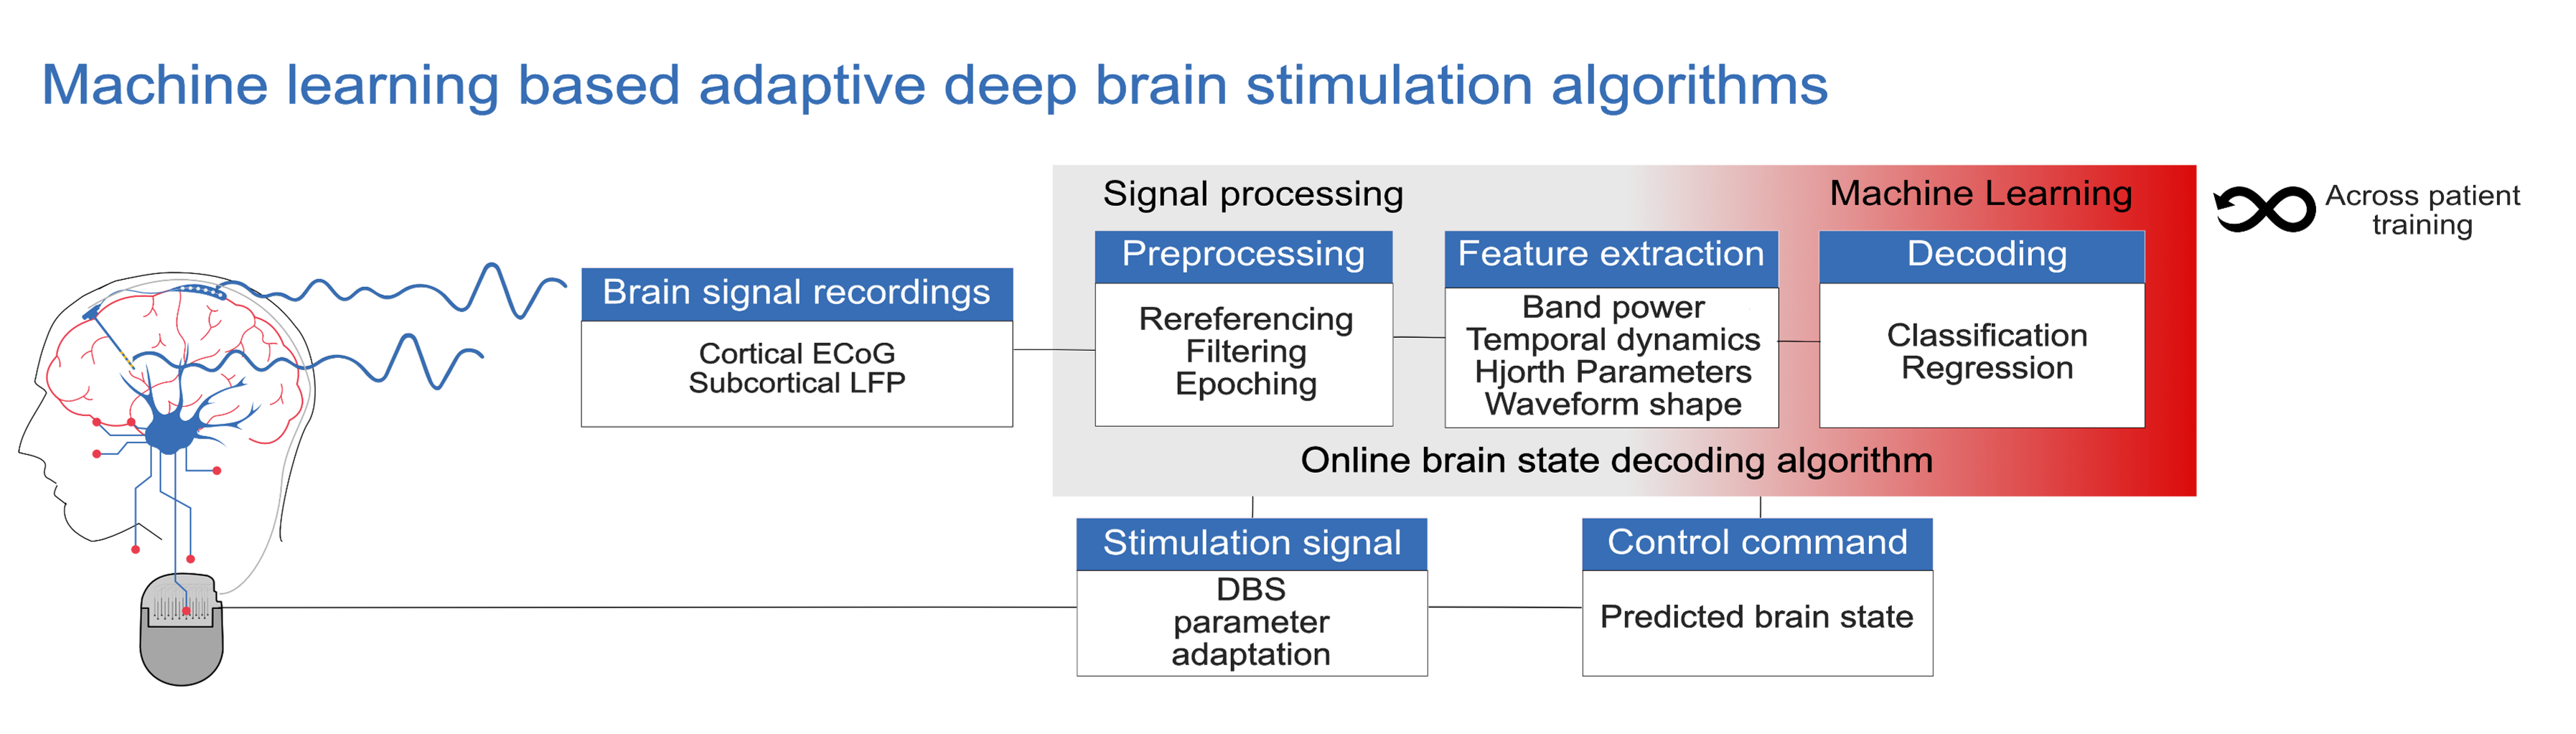

For this workshop we will start using a dataset that was generated by [py_neuromodulation](https://github.com/neuromodulation/py_neuromodulation).\
This framework does sample-wise automatic feature extraction of different modalities. Feel free to reach out and use it! 👍

Starting of with our analysis we first have to import necessary standard libraries: 

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 1. Reading the data

We will read our dataset using pandas. The data contains precomputed oscillatory activity features, estimated by *py_neuromodulation*.\
We will load it from the BIDS derivatives folder:

In [17]:
df = pd.read_csv('examples/data/derivatives/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg_FEATURES.csv', index_col=[0])

In [18]:
df

,LFP_STN_R_234-LFP_STN_R_567_fft_theta,LFP_STN_R_234-LFP_STN_R_567_fft_alpha,LFP_STN_R_234-LFP_STN_R_567_fft_low beta,LFP_STN_R_234-LFP_STN_R_567_fft_high beta,LFP_STN_R_234-LFP_STN_R_567_fft_low gamma,LFP_STN_R_234-LFP_STN_R_567_fft_high gamma,LFP_STN_R_234-LFP_STN_R_567_fft_HFA,LFP_STN_R_567-LFP_STN_R_234_fft_theta,LFP_STN_R_567-LFP_STN_R_234_fft_alpha,LFP_STN_R_567-LFP_STN_R_234_fft_low beta,...,ECOG_AT_SM_L_5-avgref_fft_HFA,ECOG_AT_SM_L_6-avgref_fft_theta,ECOG_AT_SM_L_6-avgref_fft_alpha,ECOG_AT_SM_L_6-avgref_fft_low beta,ECOG_AT_SM_L_6-avgref_fft_high beta,ECOG_AT_SM_L_6-avgref_fft_low gamma,ECOG_AT_SM_L_6-avgref_fft_high gamma,ECOG_AT_SM_L_6-avgref_fft_HFA,time,ANALOG_ROT_R_1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.0,54.660730
1,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,...,1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1100.0,55.367091
2,-0.817079,-1.261720,0.898509,-1.175679,0.989316,1.276108,-0.666883,-0.817079,-1.261720,0.898509,...,-1.092876,-0.872705,-0.921306,1.141291,1.301047,0.306111,-0.576075,0.357703,1200.0,54.910138
3,-1.181140,-1.017609,-1.037940,-0.339078,-0.258962,0.530215,-0.812672,-1.181140,-1.017609,-1.037940,...,-0.460388,-1.328740,-0.255155,-1.304577,-1.660016,-1.703392,0.379398,-0.031020,1300.0,55.316698
4,0.259496,-0.524616,0.803120,0.042480,1.675814,0.908499,-0.538637,0.259496,-0.524616,0.803120,...,1.425453,-0.683542,-0.090378,-1.092397,-0.795146,1.779646,1.994391,1.994793,1400.0,55.332774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.739675,0.155780,0.516849,0.335039,1.421253,1.882176,-0.368744,0.739675,0.155780,0.516849,...,3.000000,0.386322,1.193776,1.307017,1.034813,1.444081,3.000000,2.251207,17500.0,59.034342
166,-0.071127,-0.442856,-0.345136,0.936503,1.195366,0.664357,-0.967834,-0.071127,-0.442856,-0.345136,...,-0.493897,0.569975,1.256816,1.902236,1.171819,2.179758,2.941018,1.885345,17600.0,59.330688
167,-0.419128,-0.544196,-0.752547,0.765279,1.835549,1.322559,-0.499896,-0.419128,-0.544196,-0.752547,...,-1.209187,0.643474,1.197065,1.626461,1.261317,0.548566,0.177024,-0.353953,17700.0,58.940000
168,-0.412830,-0.448861,-0.592719,1.238253,1.748024,0.968044,-0.135567,-0.412830,-0.448861,-0.592719,...,-1.086947,1.163378,2.452651,1.261157,1.789506,0.760668,2.379931,1.940749,17800.0,58.899072


#### 2. Exploratory Data Analysis
Now we will analyze some features. First we will extract the label for our machine learning analysis, which is in this task a movement trace of a rotational handle, that the patient operated. 

✅ **Task: plot the column 'ANALOG_ROT_R_1' over the 'time' column**.

*Hint: matplotlib pyplot is your friend :)* 

Text(0.5, 1.0, 'Rotational Handle Label')

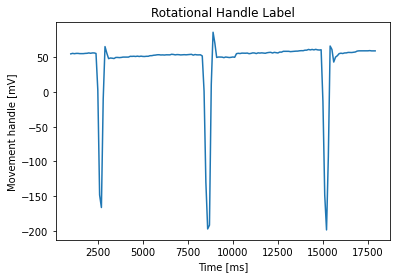

In [19]:
plt.plot(df["time"], df["ANALOG_ROT_R_1"])
plt.xlabel("Time [ms]")
plt.ylabel("Movement handle [mV]")
plt.title("Rotational Handle Label")

Since we want to build a machine learning classifier, that expects discrete values, we need to binarize the continous analog voltage.\
We will call it 'mov_class' and save it to the dataframe. 

In [20]:
df["mov_class"] = np.array(df["ANALOG_ROT_R_1"]<0, int)

Next we will explore the data further to get some understanding of the features we will use.\

✅ **Task: Plot the time trace of single feature over time**. 

Text(0.5, 0, 'Time [ms]')

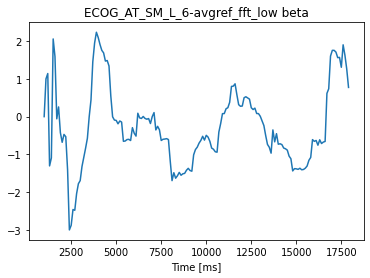

In [21]:
feature = "ECOG_AT_SM_L_6-avgref_fft_low beta"
plt.plot(df["time"], df[feature])
plt.title(feature)
plt.xlabel("Time [ms]")

Now we want to select a single electrocorticographical channel called 'ECOG_AT_SM_L_1'.

✅ **Task: Select all features of a single channel into a new pandas dataframe called 'df_ECOG_L_1'**

In [22]:
ch_name = "ECOG_AT_SM_L_1"
features_ch = [ch for ch in df.columns if ch_name in ch]
df_ECOG_L_1 = df[features_ch]

We will now have a closer look at the features of channels 'ECOG_AT_SM_L_1'. Our first analyze will be looking at an image of the features over time.

✅ **Task: Use the matplotlib.imshow function to plot all features from 'df_ECOG_L_1'. Overlay the label 'mov_class' that we created above**

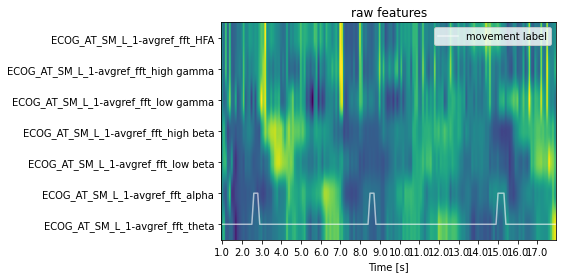

In [23]:
plt.imshow(df_ECOG_L_1.T, aspect='auto')
plt.plot(df["mov_class"], color="white", alpha=0.6, label="movement label")
plt.yticks(np.arange(0, 7, 1), df_ECOG_L_1.columns)
plt.xticks(np.arange(0, df["time"].shape[0], 10), np.round(df["time"][::10]/1000,2))
plt.xlabel("Time [s]")
plt.title("raw features")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

We can also explore other analysis methods. The package [seaborn](https://seaborn.pydata.org/) provides many helpful visualizations for pandas dataframes. 

✅ **Task: Test now the seabon [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) method for plotting the correlations of the 'df_ECOG_L_1' features.**

*Hint: Estimate first the correlation matrix of the feature dataframe, use then the heatmap function for plotting*

In [24]:
import seaborn as sns

<AxesSubplot:>

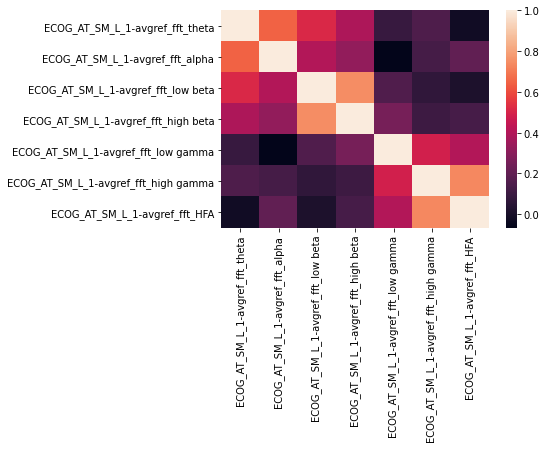

In [25]:
corr = df_ECOG_L_1.corr()
sns.heatmap(corr, 
            xticklabels=df_ECOG_L_1.columns.values,
            yticklabels=df_ECOG_L_1.columns.values)

✅ **Optionally (*Advanced*) Task: Visualize in a boxplot the features separated for mov_class 0 or 1**

*Hint: Extract first the dataframe segments where mov_class is 0 or 1. Use then pd.melt for reshaping the dataframe into 'variable' and 'value' columns.*

*Add a third column 'mov' being 0 or 1. Then combine the dataframes and call the seaborn boxplot method. Set 'hue' to the 'mov' column.*

In [26]:
df_mov = pd.melt(df_ECOG_L_1[df["mov_class"]==0])
df_mov["mov"] = 0
df_rest = pd.melt(df_ECOG_L_1[df["mov_class"]==1])
df_rest["mov"] = 1

df_sns = pd.concat([df_mov, df_rest])

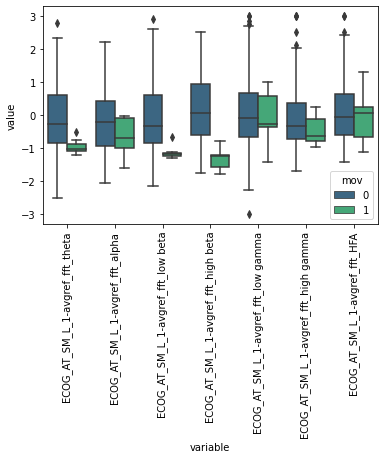

In [27]:
sns.boxplot(data=df_sns, x="variable", y="value", hue="mov", palette="viridis")
plt.xticks(rotation=90)
plt.show()

#### 3. Feature Preprocessing

We will now define the dataset we will use throughout the following analaysis. For that we use all available features coming from 'ECOG' or 'LFP' channels.

The label will be the upper defined *mov_class*. 

In [28]:
X = df[[ch for ch in df.columns if "ECOG" in ch or "LFP" in ch]]
y = df["mov_class"]

#### Preprocessing Scaling

✅ **Task: Use the sklearn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) Function to scale the data to zero mean and unit variance.**

Check for a single feature if standard scaling (commonly called *z-scoring*) was applied beforehand and if it worked after applying the operation.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X.iloc[:,0].mean()

0.23401445390918074

In [31]:
X.iloc[:,0].std()

0.9980977502348917

In [32]:
X_scaled = StandardScaler().fit_transform(np.array(X))

In [33]:
X_scaled[:,0].mean()

0.0

In [34]:
X_scaled[:,0].std()

1.0

#### Preprocessing Dimensionality Reduction

We will now apply a dimensionality reduction method called *Principal Component Analysis* (PCA).\
PCA finds an orthonormal basis, preserving as much variance of the data as possible. It can be shown that the principle components are eigenvectors of the data covariance matrix.

For visualization reason we will pick here only two components, and enable whitening to have zero mean and unit variance features, which will in turn be beneficial for many classifiers.

✅ **Task: Define a sklearn [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) object with two components, and *whitening* set to True. Transform the scaled data then and save it to X_transformed. 
Plot in a scatter plot then the transformed two components, set the color to the defined label *y*.**

In [ ]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X_scaled)

PCA(n_components=2, whiten=True)

In [36]:
X_transform = pca.transform(X_scaled)

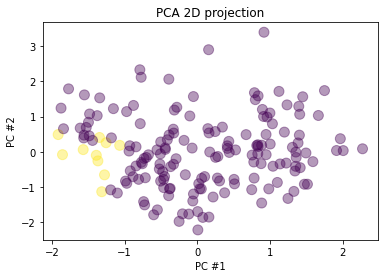

In [37]:
plt.scatter(X_transform[:,0], X_transform[:,1], c=y, s=100, alpha=0.4)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("PCA 2D projection")
plt.show()

Now we have made a dimensionality reduction coming from 77 to 2 features. The data seems segmented enough to be learned by a simple classifier right?


Let's test a first classifier, and visualize the decision boundaries.

✅ **Task: Use sklearn's train_test_split method to split data with a 40% test size into training and test set.**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = \
        train_test_split(X_transform, y, test_size=.4, random_state=42)

#### 4. We now evaluate a first simple model

✅ **Task: Use a [LogisticRegression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) without any regularization (check documentation parameters) to fit the data and report the resulting [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) on the test set.**

In [42]:
from sklearn import linear_model, metrics

In [43]:
clf = linear_model.LogisticRegression(penalty='none')

In [44]:
clf.fit(X_train, y_train)
score = metrics.accuracy_score(y_test, clf.predict(X_test))

In [45]:
score

0.8823529411764706

Great! We will now use the classifiers 'decision function' to visualize the model's predictions.\
First let's define a grid where we can test our fitted classifier on:

In [46]:
h = .02  # step size in the mesh

x_min, x_max = X_transform[:, 0].min() - .3, X_transform[:, 0].max() + .3
y_min, y_max = X_transform[:, 1].min() - .3, X_transform[:, 1].max() + .3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Now plot the decision function as well as individual data points. To distinguish the test set points will set the edgecolor red:

Text(0.5, 1.0, 'Logistic Regression Linear Classification Decision Boundary')

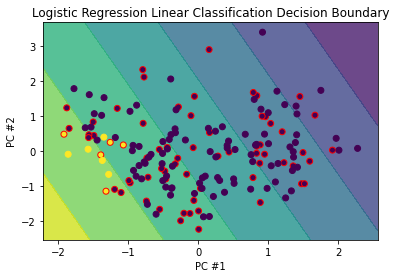

In [47]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

ax = plt.subplot()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.8)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='red')
ax.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.xlabel("PC #1")
plt.ylabel("PC #2")

plt.title("Logistic Regression Linear Classification Decision Boundary")

### Group Discussion 💬

Revise the previous machine learning pipeline steps. Make a list of what could be optimized and what lead to a possibly faulty model evaluation.

**Problem 1** Preprocessing (StandardScaling) was conducted for the whole dataset! This *always* needs to be separated for train and test sets.

**Problem 2** Dimensionality reduction (PCA) was conducted for the whole dataset! This *always* needs to be separated for train and test sets.

**Problem 3** Our performance metric does not capture the label distribution! The Accuracy_score is biased towards a single class.

**Problem 4** We chose a linear classifier even though the data represents a non-linear problem.

**Problem 5** Consecutive samples are correlated, we should choose a non-shuffled validation approach!

#### 5. Definition of a validation strategy

In the following example we will define a Kfold cross validation strategy.

✅ **Task: Use sklearn's [kFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) method to split data 3 times without shuffling. Plot each label of the respective test sets.**

In [ ]:
from sklearn import model_selection, ensemble, svm, base

✅ **Task: Fixing errors**

Now it's your turn to fix the errors we made above. Therefore write a function 'run_validation' that get's as input parameters the machine learning model we're going to evaluate on, and the defined kFold cross validation.

Then iterate through the three folds, pay attention that you\
**1. define the PCA preprocessing separatedly for train and test set**\
**2. clone the model within each itereation ([sklearn.base.clone](https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html))**\
**3. report then the [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html)**

Return from the function the accuracy scores, concatenated test labels and the model's predictions.\
In addition return the transformed train and test features and labels. 

In [ ]:
def run_validation(model=svm.SVC(gamma=2, C=1), cv = model_selection.KFold(n_splits=3, shuffle=False)):
    
    acc_score = []
    l_pred_values = []
    l_y_test = []
    
    
    # YOUR CODE HERE
    
    return clf_, acc_score, np.concatenate(l_y_test), np.concatenate(l_pred_values), X_te_pca, X_tr_pca,\
            y_test, y_train

✅ **Task: Test the above function using a [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), and set *gamma* and *C* to 50, *class_weihts* should be *balanced*.**

What are the accuracy scores?

In [ ]:
clf, acc_scores, y_test_, y_pred_, X_te_pca, X_tr_pca,\
  y_test, y_train  = run_validation(model=svm.SVC(gamma=50, C=50, class_weight="balanced"))

✅ **Task: Plot the true label movements and predictions. In addition visualize the deccision function as done above.**

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

ax = plt.subplot()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.8)
ax.scatter(X_te_pca[:,0], X_te_pca[:,1], c=y_test, edgecolors='r')
ax.scatter(X_tr_pca[:,0], X_tr_pca[:,1], c=y_train)

plt.xlabel("PC #1")
plt.ylabel("PC #2")

plt.title("plotting linear classification decision boundary")

### Group Discussion 💬

What went wrong now?\
How do we need to change the regularization parameter *C* to reduce overfitting? What about the kernel coefficient *gamma*?

✅ **Task: Change the regularization parameter C and kernel coefficient gamma to achieve higher generalization performance, plot again the decision surface function.**

✅ **(Optional) Additional Tasks:**
- Check out different classifiers (e.g. [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or [Quadratic Discriminant Analysis](https://scikit-learn.org/0.15/modules/generated/sklearn.qda.QDA.html)). Why is the decision surface not a smooth function for Classification Tree methods?


- Try to leave out the PCA dimensionality reduction. How does the performance change? Should we higher or lower regularization now?


- Check the *feature_importance* parameter. Which features seem most informative?


- Check out the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) implementation. What is missing in the sklearn implementation? Why should we switch to tensorflow or pytorch implementation? :) 